In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
dfA = pd.read_csv("historical_RAPTOR_by_player.csv")
dfTemp = dfA.query('season == 2020')

In [3]:
dfTemp.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
86,Jaylen Adams,adamsja01,2020,43,21,6.207690,7.656298,13.863988,0.180289,0.000000,0.180289,3.989698,3.511923,7.501621,-1.784967
106,Steven Adams,adamsst01,2020,3964,1890,0.315797,1.657408,1.973205,4.542775,4.329823,0.212952,-0.458575,1.632839,1.174265,-0.445224
115,Bam Adebayo,adebaba01,2020,6336,3104,-0.103949,2.226652,2.122704,7.755916,5.311195,2.444721,0.722645,1.480391,2.203036,-0.649095
205,LaMarcus Aldridge,aldrila01,2020,3648,1754,-0.660440,0.777019,0.116579,2.530917,2.530917,0.000000,-0.711668,1.229885,0.518216,-1.367530
221,Kyle Alexander,alexaky01,2020,31,13,-6.054527,-3.622453,-9.676980,-0.047025,-0.047025,0.000000,-2.723092,-4.931522,-7.654614,2.402348


In [4]:
X = np.array(dfTemp[['war_reg_season','war_playoffs']])

In [5]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [15]:
def k_func(col1, col2,numclusters):
    X = np.array(dfTemp[[col1,col2]])
    #Initialize
    K = numclusters
    #however...
    x1_coords = [x[0] for x in X]
    centroids = np.empty([K,2])
    for i in range(K):
        centroids[i] = X[random.randint(0,len(X))]
    # centroids = np.random.choice(X[0], K, replace=False)
    dists = [0]*K
    clusters = np.array([-1]*len(X))

    for _ in range(100): #100 steps is fine; or a tolerance/change check.
        #update classifications
        for j in range(len(X)):
            dists = [dist(X[j], cent) for cent in centroids]
            assignment = dists.index(min(dists))
            clusters[j] = assignment
        #update centroids
        for j in range(K):
            centroids[j]=[np.sum(X[clusters==j,0])/len(X[clusters==j,0]),np.sum(X[clusters==j,1])/len(X[clusters==j,1])]
    #initial cluster plot
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=clusters)
    plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')
    plt.axis([-10, 30, -5, 10])
    plt.xlabel("war_reg_season - 2020")
    plt.ylabel("war_playoffs - 2020")
    col1best = dfTemp[[col1]].max()
    col2best = dfTemp[[col1]].max()
    plt.text(16.7056,3.13679,'James Harden')
    plt.text(9.30393,6.18924, 'Anthony Davis')
    plt.show()
    ###END OPTIONAL

war_reg_season    16.705593
dtype: float64


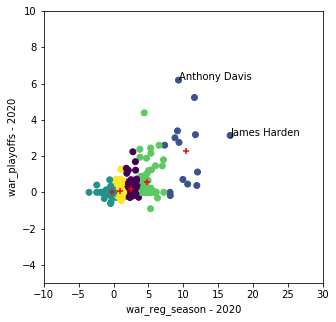

In [16]:
k_func("war_reg_season","war_playoffs",5)

In [9]:
max_war_reg = dfTemp['war_reg_season'].idxmax()
max_war_play = dfTemp['war_playoffs'].idxmax()

In [10]:
dfA.iloc[max_war_reg]

player_name         James Harden
player_id              hardeja01
season                      2020
poss                        6253
mp                          2931
raptor_offense           8.48846
raptor_defense           1.97839
raptor_total             10.4668
war_total                19.8424
war_reg_season           16.7056
war_playoffs             3.13679
predator_offense         8.04281
predator_defense         2.72868
predator_total           10.7715
pace_impact           -0.0945816
Name: 6627, dtype: object

In [11]:
dfA.iloc[max_war_play]

player_name         Anthony Davis
player_id               davisan02
season                       2020
poss                         6113
mp                           2900
raptor_offense             3.0833
raptor_defense             4.3473
raptor_total               7.4306
war_total                 15.4932
war_reg_season            9.30393
war_playoffs              6.18924
predator_offense          2.78465
predator_defense          4.66116
predator_total            7.44581
pace_impact                 1.126
Name: 3860, dtype: object

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], c=kmeans)

NameError: name 'kmeans' is not defined

<Figure size 864x864 with 0 Axes>

In [ ]:
dfA[['player_name','war_total']]

In [ ]:
dfA.nlargest(15, 'war_total')

In [ ]:
dfA.nlargest(15, 'war_reg_season')

In [ ]:
dfA.nlargest(15, 'war_playoffs')

In [ ]:
dfA.nlargest(15, 'raptor_offense')

In [ ]:
dfA.nlargest(15, 'raptor_defense')

In [ ]:
dfA.nlargest(15, 'war_total')

In [ ]:
max_index = dfA['season'].idxmin()

In [ ]:
dfA.iloc[max_index]